# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

## Plot the points

In [21]:
import numpy as np

N= 100;

np.random.seed(123)
X1_1 = np.random.normal(loc=-1,scale=0.5, size = N)
X1_2 = np.random.normal(loc=2.5,scale=1, size = N)
X1_3 = np.random.normal(loc=4,scale=1, size = N)

X2_1 = np.random.exponential(scale=3, size= N)
X2_2 = np.random.lognormal(mean=0.5,sigma=0.5, size = N)
X2_3 = np.random.poisson(lam=2, size = N) +5

# creo i verttori delle labels 
y1= np.ones(N)
y2=2* np.ones(N)
y3=3* np.ones(N)

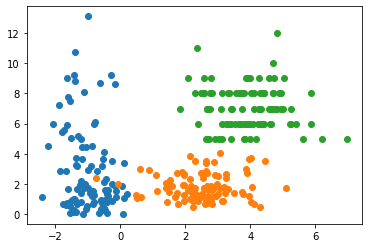

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.scatter(X1_3, X2_3)

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [23]:
#Write your code here
X = np.stack((np.ones(N*3),
np.concatenate((X1_1, X1_2, X1_3)),
np.concatenate((X2_1, X2_2, X2_3))), axis= 1 )

y = np.concatenate((y1,y2,y3))

## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [24]:
#Write your code here classe 3 vs il resto 
positive_class = 3
y_class = -np.ones(y.shape[0])  # .shape[0] ritorna il numero di righe della matrice

y_class[y == positive_class] = 1  #assegno uno a tutte le celle y che hanno valore 1


### Plot this binary problem

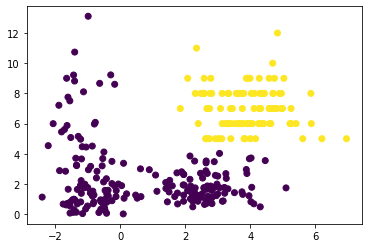

In [25]:
plt.scatter(X[:,1], X[:,2], c=y_class) #con c vado a prendere il colore di (ovvero colore dello stesso colore che aveva y_CLASS)

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [26]:
def sse(X, y, w):
  error= np.sum(np.square(y-np.dot(X,w)))/2
  return error

## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

# of errors =  0.0


/var/folders/p7/spkm18x575v6mlwyqx6xlyb40000gp/T/ipykernel_4479/3302264494.py:2: RuntimeWarning: overflow encountered in square
  error= np.sum(np.square(y-np.dot(X,w)))/2


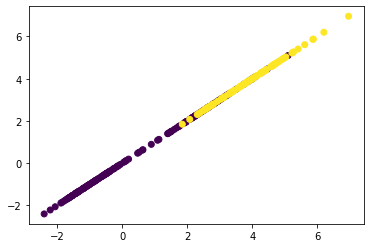

In [27]:
w= np.random.uniform(low=-1,high=1 , size =3)
plt.scatter(X[:,1], X[:,1], c= y_class)
eta = 1e-5
max_epochs = 100
batch_size = 10 

#track totla error per epoch
sse_epoch = np.zeros(max_epochs+1)

#set checkpoint 
errors_epoch = np.zeros (max_epochs+1)

for epoch in range(max_epochs):
    #compute error 
    sse_epoch[epoch] = sse(X, y_class, w)
    errors_epoch[epoch] = sum ( (y_class * np.sign(np.dot(X,w)))<0)

    #generate random permutation
    rand_perm = np.random.permutation(range(y_class.shape[0]))
    X = X[rand_perm, :]
    y_class = y_class[rand_perm]

    #mini batch learning 
    for j in range(0, y_class.shape[0], batch_size):
        X_batch= X[j:(j+batch_size)]
        y_batch = y_class[j:(j+batch_size)]
        errors = y_batch -np.dot(X_batch, w)

        w = w +eta + np.dot(np.transpose(X_batch), errors)

sse_epoch[epoch+1] = sse (X, y_class, w)
errors_epoch[epoch + 1] = sum ( y_class * np.sign(np.dot(X, w)) <0)

print('# of errors = ', errors_epoch[-1])
plt.plot([np.min(X), np.max(X)], [np.min(X) * (-w[1]/w[2]) - w[0]/w[2], np.max(X) * (-w[1]/w[2]) - w[0]/w[2]])

## Plot number of errors per epoch

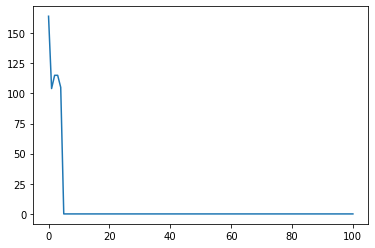

In [28]:
import matplotlib.pyplot as plt
plt.plot(errors_epoch)


# Polynomial regression task

In this exercies, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some randome noise with a gaussian distribution (mean zero, standard deviation 2.5).

In [41]:
a = -1
b = 2
c = -3
d = 4

X1 = np.concatenate((X1_1,X1_2,X1_3),  axis= 0)
disturbo = np.random.normal(loc=0, scale=0.5, size=N*3)

Y = a*pow(X1,3) + b*pow(X1,2) + c*X1+ d + disturbo


## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [30]:
#Write your code here


## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

In [31]:
#Write your code here


## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

In [32]:
#Write your code here
